In [9]:
#Mount my drive- run the code, go to the link, accept.
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [10]:
import os
os.chdir("/content/gdrive/My Drive/OwnJupyterNotebooks/")
os.getcwd()

'/content/gdrive/My Drive/OwnJupyterNotebooks'

In [0]:
# Install to access Tensorflow 2
#!pip install --pre -U tensorflow

In [13]:
import tensorflow as tf
print(tf.__version__)

2.0.0


In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [0]:
NUM_WORDS = 10000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

def multi_hot_sequences(sequences, dimension):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0  # set specific indices of results[i] to 1s
    return results


train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

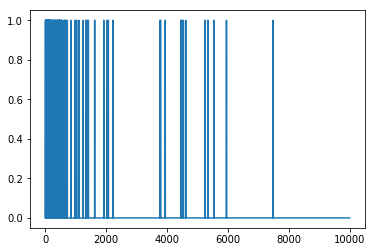

In [16]:
plt.plot(train_data[0])

### Demonstrating Overfitting

In [17]:
baseline_model = keras.Sequential([
    # `input_shape` is only required here so that `.summary` works.
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

baseline_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

baseline_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [18]:
baseline_history = baseline_model.fit(train_data,
                                      train_labels,
                                      epochs=20,
                                      batch_size=512,
                                      validation_data=(test_data, test_labels),
                                      verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 4s - loss: 0.4691 - accuracy: 0.8194 - binary_crossentropy: 0.4691 - val_loss: 0.3237 - val_accuracy: 0.8788 - val_binary_crossentropy: 0.3237
Epoch 2/20
25000/25000 - 3s - loss: 0.2392 - accuracy: 0.9134 - binary_crossentropy: 0.2392 - val_loss: 0.2851 - val_accuracy: 0.8857 - val_binary_crossentropy: 0.2851
Epoch 3/20
25000/25000 - 4s - loss: 0.1773 - accuracy: 0.9378 - binary_crossentropy: 0.1773 - val_loss: 0.2941 - val_accuracy: 0.8844 - val_binary_crossentropy: 0.2941
Epoch 4/20
25000/25000 - 4s - loss: 0.1413 - accuracy: 0.9524 - binary_crossentropy: 0.1413 - val_loss: 0.3135 - val_accuracy: 0.8789 - val_binary_crossentropy: 0.3135
Epoch 5/20
25000/25000 - 3s - loss: 0.1167 - accuracy: 0.9624 - binary_crossentropy: 0.1167 - val_loss: 0.3428 - val_accuracy: 0.8752 - val_binary_crossentropy: 0.3428
Epoch 6/20
25000/25000 - 3s - loss: 0.0982 - accuracy: 0.9696 - binary_crossentropy: 0.0982 - val_loss: 0.3868

#### Creating a smaller model for comparison

In [19]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

smaller_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy', 'binary_crossentropy'])

smaller_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [20]:
smaller_history = smaller_model.fit(train_data,
                                    train_labels,
                                    epochs=20,
                                    batch_size=512,
                                    validation_data=(test_data, test_labels),
                                    verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 4s - loss: 0.6170 - accuracy: 0.7295 - binary_crossentropy: 0.6170 - val_loss: 0.5269 - val_accuracy: 0.8460 - val_binary_crossentropy: 0.5269
Epoch 2/20
25000/25000 - 3s - loss: 0.4225 - accuracy: 0.8775 - binary_crossentropy: 0.4225 - val_loss: 0.3760 - val_accuracy: 0.8753 - val_binary_crossentropy: 0.3760
Epoch 3/20
25000/25000 - 3s - loss: 0.2954 - accuracy: 0.9085 - binary_crossentropy: 0.2954 - val_loss: 0.3141 - val_accuracy: 0.8845 - val_binary_crossentropy: 0.3141
Epoch 4/20
25000/25000 - 3s - loss: 0.2339 - accuracy: 0.9240 - binary_crossentropy: 0.2339 - val_loss: 0.2891 - val_accuracy: 0.8894 - val_binary_crossentropy: 0.2891
Epoch 5/20
25000/25000 - 3s - loss: 0.1978 - accuracy: 0.9346 - binary_crossentropy: 0.1978 - val_loss: 0.2817 - val_accuracy: 0.8895 - val_binary_crossentropy: 0.2817
Epoch 6/20
25000/25000 - 3s - loss: 0.1695 - accuracy: 0.9435 - binary_crossentropy: 0.1695 - val_loss: 0.2879

#### Creating a bigger model to see overfitting

In [21]:
bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

bigger_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy','binary_crossentropy'])

bigger_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               5120512   
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [22]:
bigger_history = bigger_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 15s - loss: 0.3484 - accuracy: 0.8513 - binary_crossentropy: 0.3484 - val_loss: 0.2917 - val_accuracy: 0.8809 - val_binary_crossentropy: 0.2917
Epoch 2/20
25000/25000 - 14s - loss: 0.1414 - accuracy: 0.9489 - binary_crossentropy: 0.1414 - val_loss: 0.3251 - val_accuracy: 0.8764 - val_binary_crossentropy: 0.3251
Epoch 3/20
25000/25000 - 13s - loss: 0.0498 - accuracy: 0.9850 - binary_crossentropy: 0.0498 - val_loss: 0.4625 - val_accuracy: 0.8648 - val_binary_crossentropy: 0.4625
Epoch 4/20
25000/25000 - 13s - loss: 0.0081 - accuracy: 0.9986 - binary_crossentropy: 0.0081 - val_loss: 0.5660 - val_accuracy: 0.8687 - val_binary_crossentropy: 0.5660
Epoch 5/20
25000/25000 - 13s - loss: 9.8098e-04 - accuracy: 1.0000 - binary_crossentropy: 9.8098e-04 - val_loss: 0.6655 - val_accuracy: 0.8692 - val_binary_crossentropy: 0.6655
Epoch 6/20
25000/25000 - 13s - loss: 2.6675e-04 - accuracy: 1.0000 - binary_crossentropy: 2.6675e

#### Plotting loss

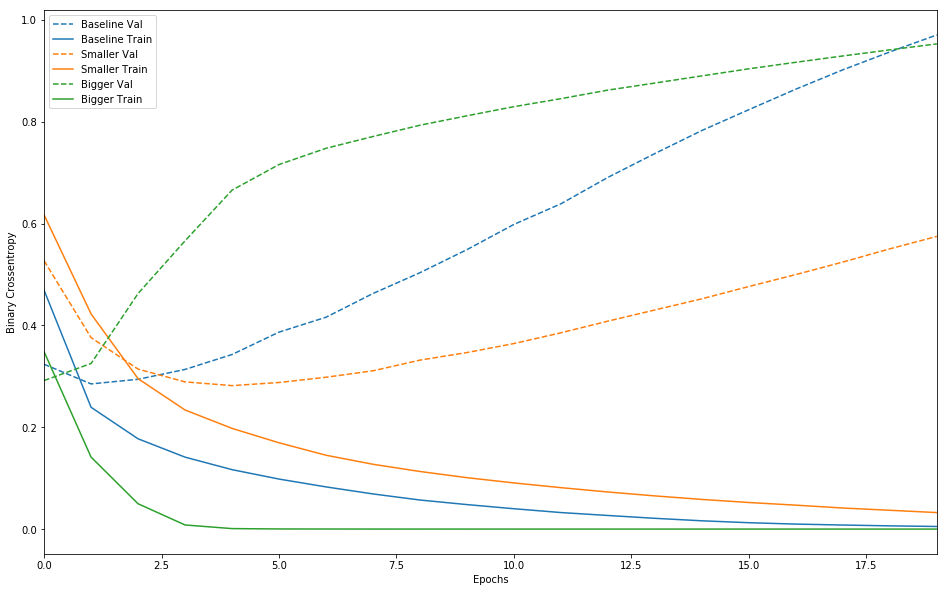

In [23]:
def plot_history(histories, key='binary_crossentropy'):
  plt.figure(figsize=(16,10))

  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])


plot_history([('baseline', baseline_history),
              ('smaller', smaller_history),
              ('bigger', bigger_history)])

#### Adding Weight Regularization

In [24]:
l2_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

l2_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])

l2_model_history = l2_model.fit(train_data, train_labels,
                                epochs=20,
                                batch_size=512,
                                validation_data=(test_data, test_labels),
                                verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 4s - loss: 0.6128 - accuracy: 0.6898 - binary_crossentropy: 0.5753 - val_loss: 0.4645 - val_accuracy: 0.8482 - val_binary_crossentropy: 0.4290
Epoch 2/20
25000/25000 - 3s - loss: 0.3494 - accuracy: 0.8988 - binary_crossentropy: 0.3089 - val_loss: 0.3419 - val_accuracy: 0.8874 - val_binary_crossentropy: 0.2970
Epoch 3/20
25000/25000 - 3s - loss: 0.2690 - accuracy: 0.9242 - binary_crossentropy: 0.2208 - val_loss: 0.3333 - val_accuracy: 0.8882 - val_binary_crossentropy: 0.2830
Epoch 4/20
25000/25000 - 4s - loss: 0.2379 - accuracy: 0.9363 - binary_crossentropy: 0.1857 - val_loss: 0.3399 - val_accuracy: 0.8856 - val_binary_crossentropy: 0.2863
Epoch 5/20
25000/25000 - 4s - loss: 0.2199 - accuracy: 0.9447 - binary_crossentropy: 0.1650 - val_loss: 0.3531 - val_accuracy: 0.8810 - val_binary_crossentropy: 0.2972
Epoch 6/20
25000/25000 - 4s - loss: 0.2103 - accuracy: 0.9477 - binary_crossentropy: 0.1532 - val_loss: 0.3630

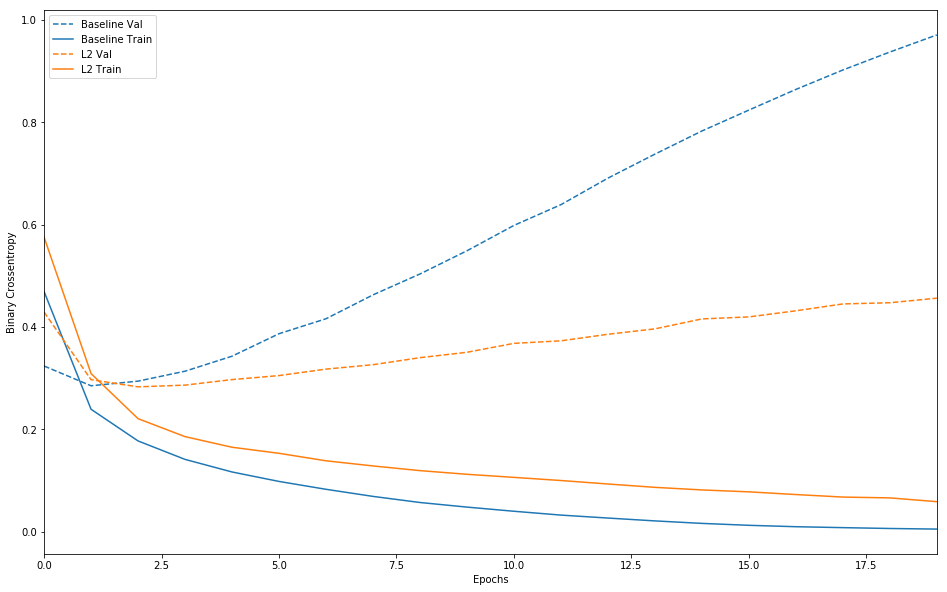

In [25]:
plot_history([('baseline', baseline_history),
              ('l2', l2_model_history)])

#### Adding a dropout
Adding a droput layer makes it so not all of the data is available to the model at once so that it can't memorize the data and overfit it.

In [26]:
dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

dpt_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy','binary_crossentropy'])

dpt_model_history = dpt_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 4s - loss: 0.6261 - accuracy: 0.6358 - binary_crossentropy: 0.6261 - val_loss: 0.5097 - val_accuracy: 0.8491 - val_binary_crossentropy: 0.5097
Epoch 2/20
25000/25000 - 3s - loss: 0.4762 - accuracy: 0.7927 - binary_crossentropy: 0.4762 - val_loss: 0.3741 - val_accuracy: 0.8783 - val_binary_crossentropy: 0.3741
Epoch 3/20
25000/25000 - 3s - loss: 0.3871 - accuracy: 0.8603 - binary_crossentropy: 0.3871 - val_loss: 0.3136 - val_accuracy: 0.8852 - val_binary_crossentropy: 0.3136
Epoch 4/20
25000/25000 - 3s - loss: 0.3161 - accuracy: 0.8926 - binary_crossentropy: 0.3161 - val_loss: 0.2846 - val_accuracy: 0.8870 - val_binary_crossentropy: 0.2846
Epoch 5/20
25000/25000 - 3s - loss: 0.2630 - accuracy: 0.9135 - binary_crossentropy: 0.2630 - val_loss: 0.2820 - val_accuracy: 0.8864 - val_binary_crossentropy: 0.2820
Epoch 6/20
25000/25000 - 3s - loss: 0.2313 - accuracy: 0.9271 - binary_crossentropy: 0.2313 - val_loss: 0.2869

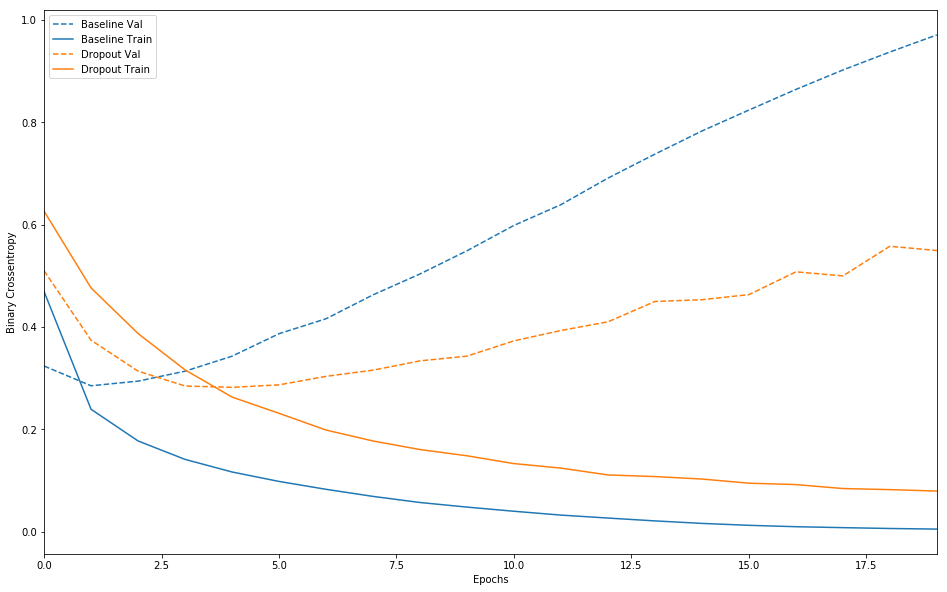

In [27]:
plot_history([('baseline', baseline_history),
              ('dropout', dpt_model_history)])